In [1]:
from tensorflow.keras.datasets import cifar10 # Загружаем базу cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization # Базовые слои для счёрточных сетей
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils # Используем для One Hot Encoding
from tensorflow.keras.preprocessing import image # Для отрисовки изображений
from google.colab import files # Для работы с файлами
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Для отрисовки графиков
from PIL import Image # Для работы с изображениями
import random # Для генерации случайных чисел 
import math # Для округления
import os # Для работы с функциями операционной системы
from google.colab import drive # Для работы с Google Drive

%matplotlib inline

In [2]:
# Загружаем базу изображений с правильными ответами Cifar10
(x_train, y_train_original), (x_test, y_test_original) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
# Выводим размерности обучающей и тестовой выборки
print("Обучающая выборка:")
print(x_train.shape)
print()

print("Правильные ответы в обучающей выборке:")
print(y_train_original.shape)
print()

print("Тестовая выборка:")
print(x_test.shape)
print()

print("Правильные ответы в тестовой выборке:")
print(y_test_original.shape)
print()

Обучающая выборка:
(50000, 32, 32, 3)

Правильные ответы в обучающей выборке:
(50000, 1)

Тестовая выборка:
(10000, 32, 32, 3)

Правильные ответы в тестовой выборке:
(10000, 1)



In [4]:
# Определяем названия классов изображений в зависимости от лэйбла
labels = ['Самолет', 'Автомобиль', 'Птица', 'Кот', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

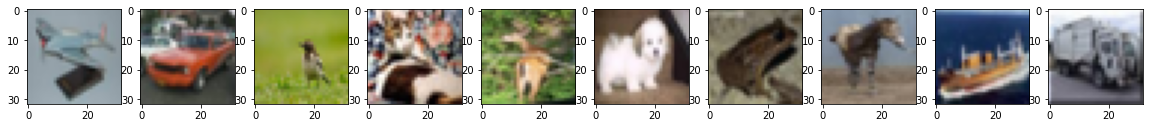

Правильные ответы: 0(Самолет); 1(Автомобиль); 2(Птица); 3(Кот); 4(Олень); 5(Собака); 6(Лягушка); 7(Лошадь); 8(Корабль); 9(Грузовик); 


In [5]:
# Выводим для примера картинки и лэйблы для каждого класса

fig, axs = plt.subplots(1, 10, figsize=(20, 3)) # Создаем полотно из 10 графиков
y = ''
for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train_original==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  label = y_train_original[index][0] # Берем ответ, который записан в 0 эл массива.
  y += str(label) + "("+labels[label]+"); " # Созраняем лэйблы для каждой картинки
  axs[i].imshow(Image.fromarray(img)) # Отображаем изображение i-ым графиков

# Отображаем картинки и соответствующие им лэйблы
plt.show()
print("Правильные ответы:", y)


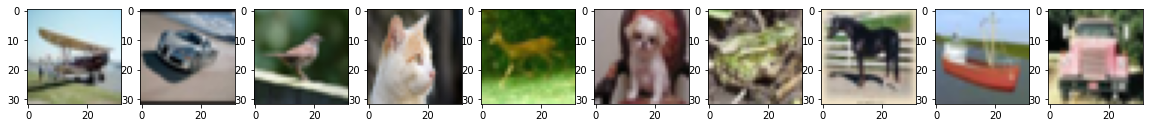

Правильные ответы: 0(Самолет); 1(Автомобиль); 2(Птица); 3(Кот); 4(Олень); 5(Собака); 6(Лягушка); 7(Лошадь); 8(Корабль); 9(Грузовик); 


In [6]:
# Выводим для примера картинки и лэйблы для каждого класса

fig, axs = plt.subplots(1, 10, figsize=(20, 3)) # Создаем полотно из 10 графиков
y = ''
for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train_original==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  label = y_train_original[index][0] # Берем ответ, который записан в 0 эл массива.
  y += str(label) + "("+labels[label]+"); " # Созраняем лэйблы для каждой картинки
  axs[i].imshow(Image.fromarray(img)) # Отображаем изображение i-ым графиков

# Отображаем картинки и соответствующие картинкам лэйблы
plt.show()
print("Правильные ответы:", y)


In [7]:
# Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train_original, 10)
y_test = utils.to_categorical(y_test_original, 10)

print("Обучающая выборка:")
print(y_train_original[5], "->", y_train[5])
print(y_train_original[234], "->", y_train[234])
print(y_train_original[45477], "->", y_train[45477])
print(y_train_original[14848], "->", y_train[14848])
print()

print("Тестовая выборка:")
print(y_train_original[15], "->", y_train[15])
print(y_train_original[334], "->", y_train[334])
print(y_train_original[8477], "->", y_train[8477])
print(y_train_original[3768], "->", y_train[3768])

Обучающая выборка:
[1] -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[6] -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[5] -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0] -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Тестовая выборка:
[9] -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[3] -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[2] -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[7] -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [8]:
# Разделяем тестовую выборку на проверочную и тестовую
x_val = x_test[0:8000]
y_val = y_test[0:8000]

x_test = x_test[8000:]
y_test = y_test[8000:]


In [9]:
# Проверим еще раз размерности выборотк

print("Обучающая выборка:")
print(x_train.shape)
print(y_train.shape)
print()

print("Проверочная выборка:")
print(x_val.shape)
print(y_val.shape)
print()

print("Тестовая выборка:")
print(x_test.shape)
print(y_test.shape)

Обучающая выборка:
(50000, 32, 32, 3)
(50000, 10)

Проверочная выборка:
(8000, 32, 32, 3)
(8000, 10)

Тестовая выборка:
(2000, 32, 32, 3)
(2000, 10)


In [10]:
# задаём batch_size
batch_size = 64

# Я испробовал разный размер окна свёртки. 3х3 даёт лучшие результаты, поэтому оставляю его.

# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3), name="bn0"))

# Подход 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="Conv2D-layer1"))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="Conv2D-layer2"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer1"))
model.add(Dropout(0.2, name="Dropout-layer1"))
model.add(BatchNormalization(name = "bn1"))

# Подход 2. Выявляем больше признаков
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name="Conv2D-layer3"))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name="Conv2D-layer4"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer2"))
model.add(Dropout(0.2, name="Dropout-layer2"))
model.add(BatchNormalization(name = "bn2"))

# Подход. Выявляем больше признаков
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name="Conv2D-layer5"))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name="Conv2D-layer6"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer3"))
model.add(Dropout(0.2, name="Dropout-layer3"))
model.add(BatchNormalization(name = "bn3"))

# Этот доп. слой BatchNormalization() очень сильно сокращает время необх. для обучения н.с.
model.add(BatchNormalization())
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten(name="flatten"))
# Выходной полносвязный классифицирующий слой
model.add(Dense(10, activation='softmax', name = "labels"))

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bn0 (BatchNormalization)    (None, 32, 32, 3)         12        
                                                                 
 Conv2D-layer1 (Conv2D)      (None, 32, 32, 32)        896       
                                                                 
 Conv2D-layer2 (Conv2D)      (None, 32, 32, 32)        9248      
                                                                 
 mp2D-layer1 (MaxPooling2D)  (None, 16, 16, 32)        0         
                                                                 
 Dropout-layer1 (Dropout)    (None, 16, 16, 32)        0         
                                                                 
 bn1 (BatchNormalization)    (None, 16, 16, 32)        128       
                                                                 
 Conv2D-layer3 (Conv2D)      (None, 16, 16, 64)        1

Epoch 1/20
782/782 [==============================] - 30s 23ms/step - loss: 1.6080 - accuracy: 0.4593 - val_loss: 1.3011 - val_accuracy: 0.5541
Epoch 2/20
782/782 [==============================] - 17s 22ms/step - loss: 1.0263 - accuracy: 0.6364 - val_loss: 1.1309 - val_accuracy: 0.6371
Epoch 3/20
782/782 [==============================] - 17s 22ms/step - loss: 0.8492 - accuracy: 0.7020 - val_loss: 1.4029 - val_accuracy: 0.5947
Epoch 4/20
782/782 [==============================] - 17s 22ms/step - loss: 0.7661 - accuracy: 0.7320 - val_loss: 1.1370 - val_accuracy: 0.6522
Epoch 5/20
782/782 [==============================] - 18s 23ms/step - loss: 0.7145 - accuracy: 0.7500 - val_loss: 2.0153 - val_accuracy: 0.5518
Epoch 6/20
782/782 [==============================] - 17s 22ms/step - loss: 0.6649 - accuracy: 0.7709 - val_loss: 1.2349 - val_accuracy: 0.6584
Epoch 7/20
782/782 [==============================] - 17s 22ms/step - loss: 0.6296 - accuracy: 0.7819 - val_loss: 1.0849 - val_accuracy:

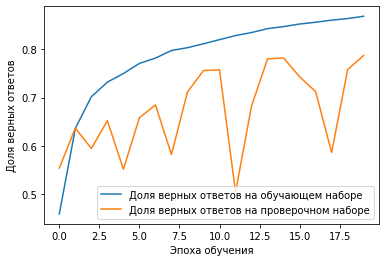

In [12]:
# Обучаем сеть на данных Cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=20,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/10
782/782 [==============================] - 18s 22ms/step - loss: 0.3714 - accuracy: 0.8709 - val_loss: 1.0074 - val_accuracy: 0.7653
Epoch 2/10
782/782 [==============================] - 17s 22ms/step - loss: 0.3570 - accuracy: 0.8757 - val_loss: 1.6532 - val_accuracy: 0.6654
Epoch 3/10
782/782 [==============================] - 18s 22ms/step - loss: 0.3515 - accuracy: 0.8784 - val_loss: 0.8390 - val_accuracy: 0.7729
Epoch 4/10
782/782 [==============================] - 18s 23ms/step - loss: 0.3444 - accuracy: 0.8805 - val_loss: 1.4411 - val_accuracy: 0.6919
Epoch 5/10
782/782 [==============================] - 18s 23ms/step - loss: 0.3304 - accuracy: 0.8850 - val_loss: 2.4656 - val_accuracy: 0.6252
Epoch 6/10
782/782 [==============================] - 17s 22ms/step - loss: 0.3274 - accuracy: 0.8873 - val_loss: 1.8970 - val_accuracy: 0.6461
Epoch 7/10
782/782 [==============================] - 17s 22ms/step - loss: 0.3211 - accuracy: 0.8890 - val_loss: 3.0017 - val_accuracy:

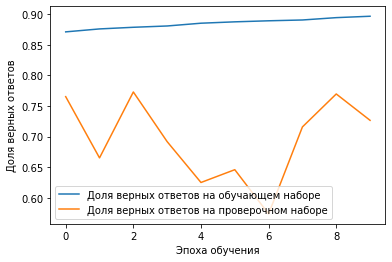

In [13]:
# Обучаем сеть на данных Cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=10,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [14]:
# задаём batch_size
batch_size = 128

# Я испробовал разный размер окна свёртки. 3х3 даёт лучшие результаты, поэтому оставляю его.

# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(32, 32, 3), name="bn0"))

# Подход 1
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="Conv2D-layer1"))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="Conv2D-layer2"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer1"))
model.add(Dropout(0.2, name="Dropout-layer1"))
model.add(BatchNormalization(name = "bn1"))

# Подход 2. Выявляем больше признаков
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name="Conv2D-layer3"))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name="Conv2D-layer4"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer2"))
model.add(Dropout(0.2, name="Dropout-layer2"))
model.add(BatchNormalization(name = "bn2"))

# Подход. Выявляем больше признаков
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name="Conv2D-layer5"))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name="Conv2D-layer6"))
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer3"))
model.add(Dropout(0.2, name="Dropout-layer3"))
model.add(BatchNormalization(name = "bn3"))

# Этот доп. слой BatchNormalization() очень сильно сокращает время необх. для обучения н.с.
model.add(BatchNormalization())
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten(name="flatten"))
# Выходной полносвязный классифицирующий слой
model.add(Dense(10, activation='softmax', name = "labels"))

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])

Epoch 1/10
391/391 [==============================] - 13s 34ms/step - loss: 0.3843 - accuracy: 0.8649 - val_loss: 0.6267 - val_accuracy: 0.8010
Epoch 2/10
391/391 [==============================] - 13s 33ms/step - loss: 0.3616 - accuracy: 0.8728 - val_loss: 0.5547 - val_accuracy: 0.8236
Epoch 3/10
391/391 [==============================] - 13s 33ms/step - loss: 0.3402 - accuracy: 0.8789 - val_loss: 0.5591 - val_accuracy: 0.8230
Epoch 4/10
391/391 [==============================] - 13s 33ms/step - loss: 0.3197 - accuracy: 0.8852 - val_loss: 0.6851 - val_accuracy: 0.8073
Epoch 5/10
391/391 [==============================] - 13s 33ms/step - loss: 0.3058 - accuracy: 0.8917 - val_loss: 0.5746 - val_accuracy: 0.8234
Epoch 6/10
391/391 [==============================] - 13s 33ms/step - loss: 0.2933 - accuracy: 0.8942 - val_loss: 0.6284 - val_accuracy: 0.8131
Epoch 7/10
391/391 [==============================] - 13s 33ms/step - loss: 0.2758 - accuracy: 0.9009 - val_loss: 0.5629 - val_accuracy:

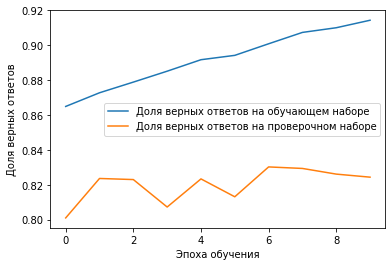

In [16]:
# Обучаем сеть на данных Cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=10,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/10
391/391 [==============================] - 13s 33ms/step - loss: 0.2317 - accuracy: 0.9164 - val_loss: 0.5996 - val_accuracy: 0.8305
Epoch 2/10
391/391 [==============================] - 13s 33ms/step - loss: 0.2208 - accuracy: 0.9196 - val_loss: 0.6090 - val_accuracy: 0.8303
Epoch 3/10
391/391 [==============================] - 13s 33ms/step - loss: 0.2161 - accuracy: 0.9240 - val_loss: 0.6348 - val_accuracy: 0.8280
Epoch 4/10
391/391 [==============================] - 13s 33ms/step - loss: 0.2056 - accuracy: 0.9264 - val_loss: 0.6421 - val_accuracy: 0.8269
Epoch 5/10
391/391 [==============================] - 13s 33ms/step - loss: 0.2025 - accuracy: 0.9274 - val_loss: 0.5984 - val_accuracy: 0.8415
Epoch 6/10
391/391 [==============================] - 13s 33ms/step - loss: 0.1920 - accuracy: 0.9304 - val_loss: 0.6619 - val_accuracy: 0.8238
Epoch 7/10
391/391 [==============================] - 13s 33ms/step - loss: 0.1856 - accuracy: 0.9331 - val_loss: 0.6343 - val_accuracy:

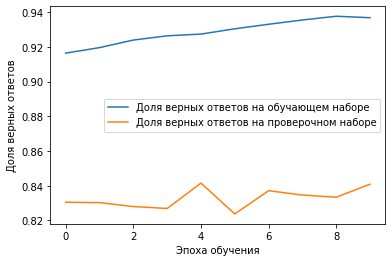

In [17]:
# Обучаем сеть на данных Cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=10,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/10
391/391 [==============================] - 13s 33ms/step - loss: 0.1298 - accuracy: 0.9538 - val_loss: 0.6935 - val_accuracy: 0.8354
Epoch 2/10
391/391 [==============================] - 13s 33ms/step - loss: 0.1336 - accuracy: 0.9513 - val_loss: 0.6635 - val_accuracy: 0.8410
Epoch 3/10
391/391 [==============================] - 13s 33ms/step - loss: 0.1298 - accuracy: 0.9536 - val_loss: 0.6563 - val_accuracy: 0.8457
Epoch 4/10
391/391 [==============================] - 13s 33ms/step - loss: 0.1267 - accuracy: 0.9550 - val_loss: 0.6908 - val_accuracy: 0.8376
Epoch 5/10
391/391 [==============================] - 13s 33ms/step - loss: 0.1205 - accuracy: 0.9572 - val_loss: 0.6495 - val_accuracy: 0.8434
Epoch 6/10
391/391 [==============================] - 13s 33ms/step - loss: 0.1230 - accuracy: 0.9560 - val_loss: 0.6862 - val_accuracy: 0.8421
Epoch 7/10
391/391 [==============================] - 13s 33ms/step - loss: 0.1205 - accuracy: 0.9575 - val_loss: 0.6903 - val_accuracy:

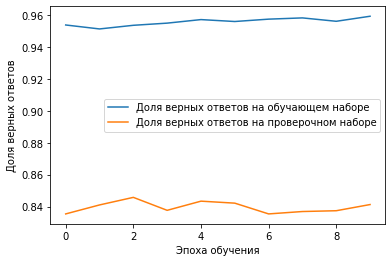

In [19]:
# Обучаем сеть на данных Cifar10
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=10,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()